MULTIPLE  LAYER PERCEPTON

Artificial Dataset

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
# circles and moons
print(X)
print(y)

Plotting

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=100, edgecolors='k', color='green')

plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=100, edgecolors='k', marker='^', color='red')

plt.show()

MLP CLASSIFIER

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# 'lbfgs', 'sgd' and 'adam'.
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,100), alpha=0.0001, solver='adam', random_state=3)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.76


The MNIST Dataset

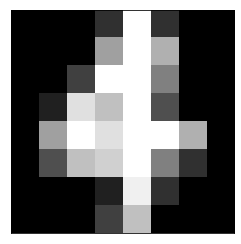

[4]


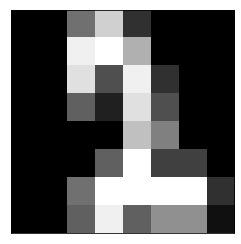

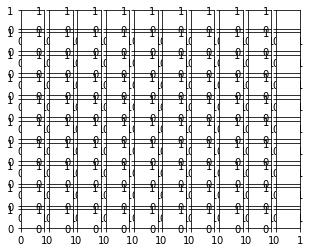

In [18]:
from sklearn.datasets import load_digits
X, y = load_digits( return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
x = X_test[0]

plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print(mlp.predict([x]))

x = X_test[100]
plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
fig, axes = plt.subplots(10, 10, figsize=(5, 4))


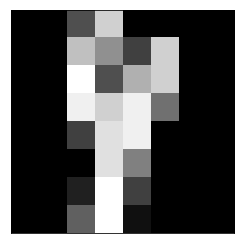

true value: 4
predicted value: 8


In [19]:
y_pred = mlp.predict(X_test)

incorrect = X_test[y_pred != y_test]

incorrect_true = y_test[y_pred != y_test]

incorrect_pred = y_pred[y_pred != y_test]
j = 3

plt.matshow(incorrect[j].reshape(8, 8), cmap=plt.cm.gray)

plt.xticks(())

plt.yticks(())

plt.show()

print("true value:", incorrect_true[j])

print("predicted value:", incorrect_pred[j])

Granular version of the MNIST dataset.

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
X2,y2= fetch_openml('mnist_784', version=1, return_X_y=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,random_state=2)
"""
print(X2.shape, y2.shape)
print(np.min(X2), np.max(X2))
print(y[0:5])
"""
print(X2_test.shape)
mlp=MLPClassifier(hidden_layer_sizes=(100,100,100,100), max_iter=5000, alpha=0.0001,solver='sgd', random_state=2)
mlp.fit(X2_train, y2_train)
print(mlp.score(X2_test, y2_test)) # 0.9648

(17500, 784)
0.9648


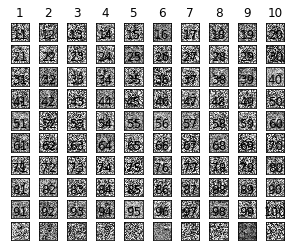

In [22]:
fig, axes = plt.subplots(10, 10, figsize=(5, 4))

for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)
plt.show()